In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.spatial import cKDTree #Uses the Nearest Neighbor Search algorithm

print "425 HW 4 Part 2 - Gravitational Lensing"
print "Winnie Wang, Prof. Andrew Connelly"
print

#Defining Constants:
Pi = np.pi
solar_mass = 2.0e30 #solar mass in kilograms
G = 6.67e-11 #gravitational constant in N*m^2/kg^2
c = 2.99e8 #speed of light in m/s
meter_pc = 3.086e16 #parsecs in meters

#Defining Functions:
def einstein_r(d_l, d_s, m): #Einstein radius equation
    m = m*solar_mass #changing mass of star to kilograms
    d_l = d_l*(meter_pc)
    d_s = d_s*(meter_pc)
    d_ls = d_s - d_l
    return ((d_ls/(d_s*d_l))*(4.0*G*m/(c**2)))**(0.5)
    
def lens(theta, einstein_theta): #Lens equation in terms of the Einstein radius equation
    return theta - einstein_theta**2/theta
    
#Making points with 2D Gaussian distributions to show gravitational lensing effect:
def point(x, mu_x, sigma_x, y, mu_y, sigma_y):
    #mu = distribution mean
    #sigma = distribution standard deviation
    norm = 1.0/(2*Pi*sigma_x*sigma_y) #normalized factor in distribution; X and Y multiplied together
    exponentX = np.exp(-((x - mu_x)**2.0/(2.0*sigma_x**2.0))) #distribution in X
    exponentY = np.exp(-((y - mu_y)**2.0/(2.0*sigma_y**2.0))) #distribution in Y
    return norm * exponentX * exponentY

425 HW 4 Part 2 - Gravitational Lensing
Winnie Wang, Prof. Andrew Connelly



Due to the large number of pixels that the graphs generate, the "Nearest Neighbor" Algorithm is used to save computational memory usage and time. The algorithm is imported from SciPy, but the algorithm generally employs calculation through compliations of vectors from a "neighborhood" of nearest points on a given point's. Once a "neighborhood" is throughly searched, the algorithm moves onto the next point to compute onto the next "neighborhood".

To use the algorithm, an arbitrary Einstein radius is calculated with 1 billion stars (with roughly masses equal to the Sun). To use calculate the lensing effect within the Einstein radius, an empty grid and another lensing grid within the Einstein radius are made. After coordinates are changed (for convenience), the Nearest Neighbor Algorithm is applied to the grid with Einstein radius onto the arbitrary Gaussian points made in the (above) part.

Part A Plotting (top: no lensing, bottom: with lensing):


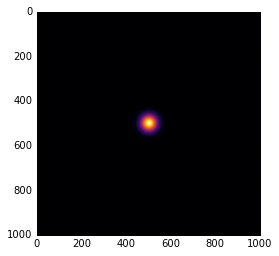

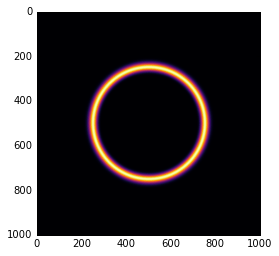

Part B Plotting (top: no lensing, bottom: with lensing):


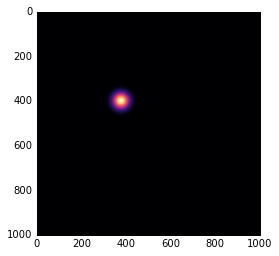

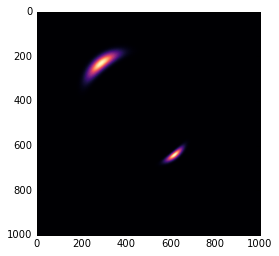

In [46]:
#Einstein radius calculation:
ein = einstein_r(1000,2000,1e9) #1 billion solar masses at 1000 parsecs and another 1000 parsecs for image

#Lensing field; created by making a 2D space by combining two 1D space:
grid_x, grid_y = np.meshgrid(np.linspace(-10,10,1000), np.linspace(-10,10,1000)) 

#Lensing field for Nearest Neighbor Search:
lense_x2, lense_y2 = np.meshgrid(np.linspace(-ein, ein, 1000),np.linspace(-ein, ein, 1000))
lense_x22 = lense_x2 * 2 #2 is multiplied as a scaling factor
lense_y22 = lense_y2 * 2

#Conversion to polar coordinates:
polar_conversion = np.arctan2(lense_x22,lense_y22) #angle after being converted to polar coordinates
theta_lensing = np.sqrt(lense_x22**2.0 + lense_y22**2.0) #setting theta to match conversion

lens_lensing = lens(theta_lensing, ein)
polar_x = lens_lensing * np.cos(polar_conversion) #x-coordinates
polar_y = lens_lensing * np.sin(polar_conversion) #y-coordinates

#Applying the 2D Nearest Neighbor Search package
neighbor = cKDTree(np.array([lense_x22.ravel(),lense_y22.ravel()]).T) #applying the algorithm
near, nearest = neighbor.query(np.array([polar_x.ravel(), polar_y.ravel()]).T, k=1)

#Point Sources:
point_behind = point(grid_x,0,0.5,grid_y,0,0.5) #directly behind lens
point_edge = point(grid_x,-2.5,0.5,grid_y,-2,0.5) #point lies on the edge of the lens

#Finding and plotting the points:
pixel_locations_1 = point_behind.ravel()[nearest]
point_behind_image = np.asarray(pixel_locations_1).reshape(1000,1000)

pixel_locations_2 = point_edge.ravel()[nearest]
point_edge_image = np.asarray(pixel_locations_2).reshape(1000,1000)

print "Part A: Image (almost) directly behind lens Plotting (top: no lensing, bottom: with lensing):"
behind = plt.imshow(point_behind)
plt.show(behind.set_cmap('inferno'))
behind_lensed = plt.imshow(point_behind_image)
plt.show(behind_lensed.set_cmap('inferno'))

print "Part B: Image within Einstein radius Plotting (top: no lensing, bottom: with lensing):"
edge = plt.imshow(point_edge)
plt.show(edge.set_cmap('magma'))
edge_lensed = plt.imshow(point_edge_image)
plt.show(edge_lensed.set_cmap('magma'))

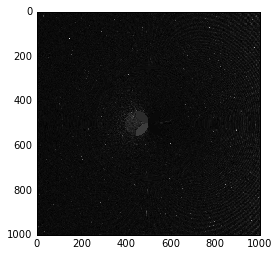

In [57]:
#Bonus Part:
space_image = mpimg.imread('hubble2.jpeg')
space_array = space_image.ravel()[nearest]
space_image_out = np.asarray(space_array).reshape(1000,1000)
plt.imshow(space_image[:,:,0],cmap='gray',interpolation='none')
plt.imshow(space_image_out,cmap='gray',interpolation='none')